# Задание 2. Разведочный анализ данных

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid', palette='deep')

In [2]:
data = pd.read_excel('default_of_credit_card_clients.xlsx', header=1, index_col=0)

In [3]:
data.AGE.value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
21      67
60      67
61      56
62      44
64      31
63      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
75       3
72       3
71       3
74       1
79       1
Name: AGE, dtype: int64

In [9]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Датасет
Представленный датасет содержит 24 колонки с переменными и 30000 строк с данными.

Зависимая бинарная переменная, y, показывает наступление дефолта клиента в следующем месяце: 0 если нет, 1 если да.
Независимые переменные представляют собой показатели размера выданного кредита, пола, возраста, уровня образования, семейного положения, а также истории и размер предыдущих платежей.

Все переменные имеют целочисленные значения (категориальные переменные перекодированы).
Пропущенных данных нет.

In [10]:
data.shape

(30000, 24)

In [12]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [16]:
data.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

<Figure size 720x432 with 0 Axes>

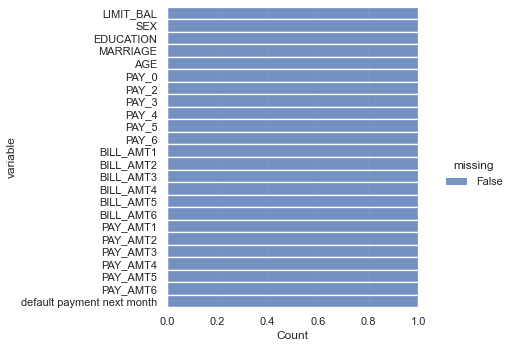

In [34]:
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [41]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Целевая переменная
Зависимая переменная показывает наступит ли дефолт у клиента в следующем месяце:
- у 78% клиентов ответ "нет";
- у 22% клиентов ответ "да".

In [51]:
data['default payment next month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

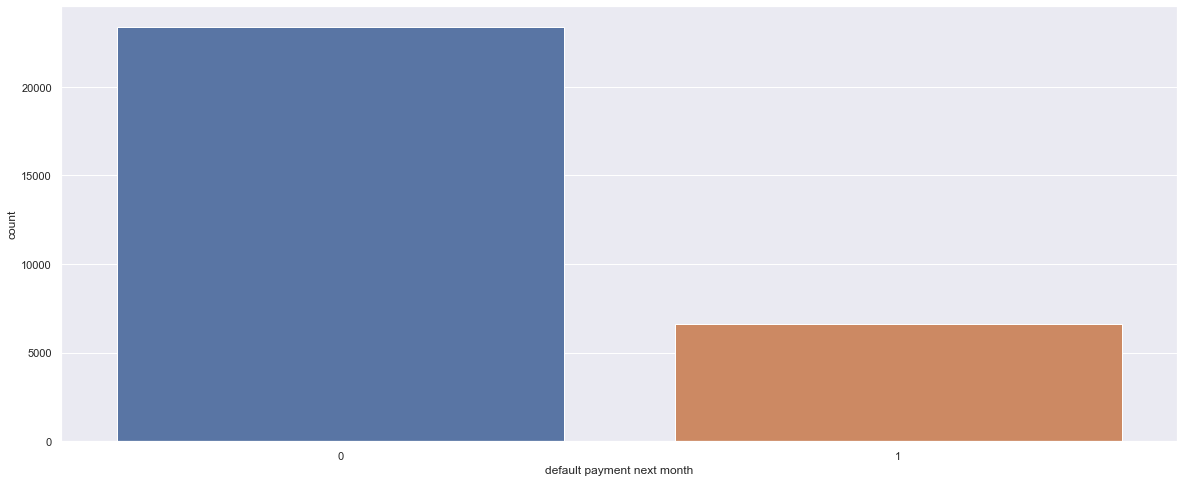

In [35]:
sns.countplot(data=data, x='default payment next month')

### Распредение заемщиков

- **Пол**: в банке среди заемщиков преобладают женщины - их 60%.
- **Образование**: у подавляющего большинства заемщиков есть высшее образование - 47% имеют степень бакалавра, 35% степень магистра / PhD, лишь 16% окончили только школу.
- **Семейное положение**: распределение примерно равное - 53% незамужних против 46% людей, состоящих в браке.
- **Возраст**: в банке представлено широкое распредение возрастов - от 21 до 79 лет. Средний возраст заемщика - 35 лет. Стоит отметить, что поскольку женщин среди клиентов больше, они берут больше кредитов практически во всех возрастных категориях, особенно с 22 до 30 лет. Лишь начиная с 50 лет распредение между женщинами и мужчинами становится примерно равным.

Text(0.5, 1.0, 'Образование')

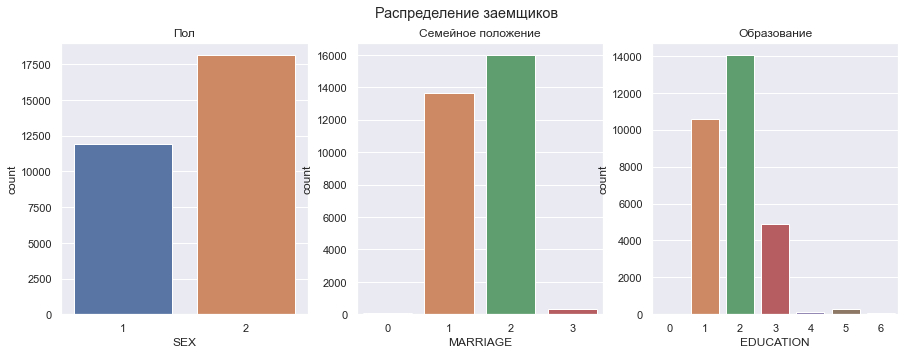

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Распределение заемщиков')
sns.countplot(ax=axes[0], data=data, x='SEX')
axes[0].set_title('Пол')
sns.countplot(ax=axes[1], data=data, x='MARRIAGE')
axes[1].set_title('Семейное положение')
sns.countplot(ax=axes[2], data=data, x='EDUCATION')
axes[2].set_title('Образование')

<AxesSubplot:xlabel='AGE', ylabel='count'>

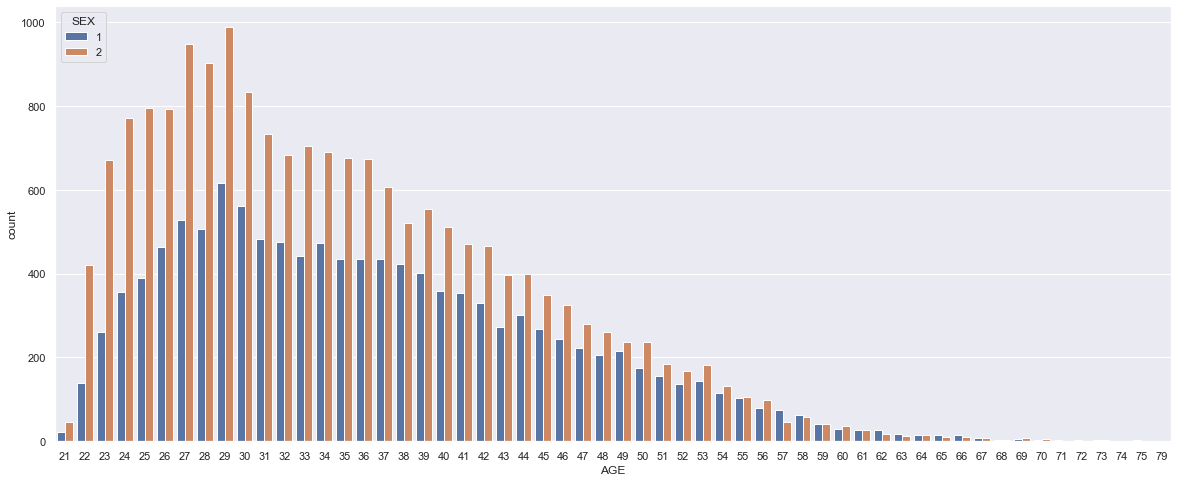

In [28]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(data=data, x='AGE', hue='SEX')

### Влияние факторов на наступление дефолта
- **Пол**: вероятность *ненаступления дефолта* для женщин существенно выше.
- **Семейное положение**: вероятность *ненаступления дефолта* у одиноких людей выше, чем у тех кто женат / замужем.
- **Образование**: у 18% людей, которые имеют только школьный диплом, существует вероятность *наступления дефолта*.
- **Возраст**: вероятность *ненаступления дефолта*  наиболее высока у заемщиков в возрасте 26 - 31 года.

Text(0.5, 1.0, 'Образование')

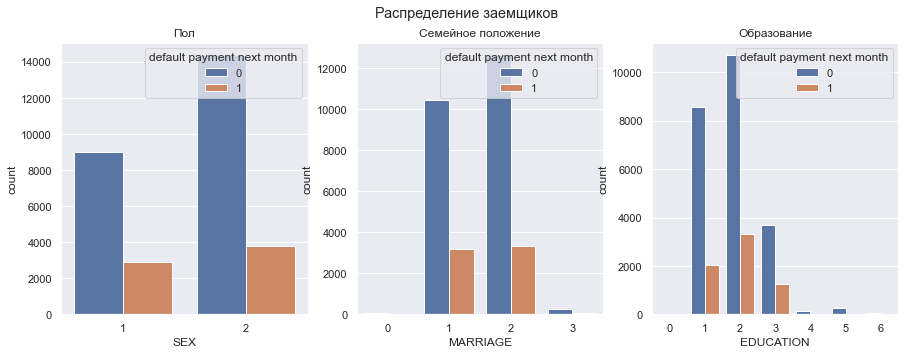

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Распределение заемщиков')
sns.countplot(ax=axes[0], data=data, x='SEX', hue='default payment next month')
axes[0].set_title('Пол')
sns.countplot(ax=axes[1], data=data, x='MARRIAGE', hue='default payment next month')
axes[1].set_title('Семейное положение')
sns.countplot(ax=axes[2], data=data, x='EDUCATION',hue='default payment next month')
axes[2].set_title('Образование')

<AxesSubplot:xlabel='AGE', ylabel='count'>

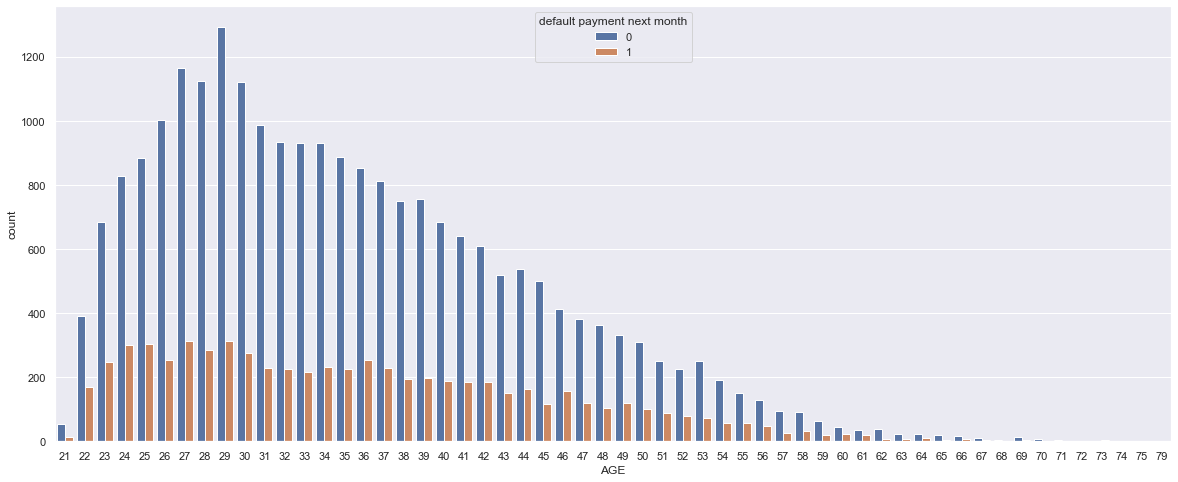

In [37]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(data=data, x='AGE', hue='default payment next month')

In [54]:
data[(data['EDUCATION'] == 3) & data['default payment next month'] == 1].sum()

LIMIT_BAL                     121257680
SEX                                1929
EDUCATION                          3711
MARRIAGE                           1739
AGE                               49750
PAY_0                               957
PAY_2                               754
PAY_3                               633
PAY_4                               508
PAY_5                               362
PAY_6                               237
BILL_AMT1                      52167555
BILL_AMT2                      50508552
BILL_AMT3                      47744291
BILL_AMT4                      43417629
BILL_AMT5                      40324501
BILL_AMT6                      38938980
PAY_AMT1                        3939058
PAY_AMT2                        4069233
PAY_AMT3                        3036734
PAY_AMT4                        2976843
PAY_AMT5                        2794915
PAY_AMT6                        3322655
default payment next month         1237
dtype: int64

In [52]:
data[data['default payment next month'] == 1].sum()

LIMIT_BAL                     863407680
SEX                               10399
EDUCATION                         12573
MARRIAGE                          10140
AGE                              237076
PAY_0                              4434
PAY_2                              3041
PAY_3                              2403
PAY_4                              1689
PAY_5                              1114
PAY_6                               744
BILL_AMT1                     321906801
BILL_AMT2                     313774088
BILL_AMT3                     299825090
BILL_AMT4                     278957204
BILL_AMT5                     262388704
BILL_AMT6                     253969246
PAY_AMT1                       22542785
PAY_AMT2                       22487079
PAY_AMT3                       22345745
PAY_AMT4                       20940739
PAY_AMT5                       21362210
PAY_AMT6                       22837675
default payment next month         6636
dtype: int64

Таким образом, согласно разведочному анализу данных, портрет наиболее надежного клиента (с низкой вероятностью дефолта) выглядит так:
    *незамужняя женщина с высшим образованием в возрасте 26 - 30 лет.*